In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import math 
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import PowerTransformer

warnings.filterwarnings('ignore')


In [63]:
sys.path.append(os.path.abspath("/home/bk_anupam/code/ML/ML_UTILS/"))

In [64]:
import data_utils

In [65]:
df_train = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")
df_train_openfe = pd.read_csv("./data/train_openfe.csv")
df_test_openfe = pd.read_csv("./data/test_openfe.csv")
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [66]:
df_train_openfe.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,2.291667,1.368750,1.791667,2.348554,0.3100,0.4430,0.3900,2637.0,0.2400,0.1900,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,1.968750,1.431250,1.531250,2.467249,0.3100,0.6720,0.4650,1173.0,0.3200,0.1700,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,32.000000,1.100000,22.000000,3.818182,0.1550,0.0155,0.0300,487.0,0.0050,0.1050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,2.380000,1.502000,1.900000,2.435419,0.3450,0.5390,0.4000,2088.0,0.2500,0.2250,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,2.810127,1.870886,2.151899,2.116373,0.3575,0.4125,0.3275,32.0,0.1975,0.2275,9


In [67]:
print(f"len(df_train) = {len(df_train)}")
print(f"len(df_test) = {len(df_test)}")

len(df_train) = 90615
len(df_test) = 60411


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [69]:
df_train_openfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   autoFE_f_0      90615 non-null  float64
 9   autoFE_f_1      90615 non-null  float64
 10  autoFE_f_2      90615 non-null  float64
 11  autoFE_f_3      90615 non-null  float64
 12  autoFE_f_4      90615 non-null  float64
 13  autoFE_f_5      90615 non-null  float64
 14  autoFE_f_6      90615 non-null  float64
 15  autoFE_f_7      90615 non-null  float64
 16  autoFE_f_8      90615 non-null  float64
 17  autoFE_f_9      90615 non-null 

In [70]:
cols_float = df_train.select_dtypes(include=["float"]).columns.to_list()
cols_float_openfe = df_train_openfe.select_dtypes(include=["float"]).columns.to_list()
cols_int = df_train.select_dtypes(include=["int64"]).columns.to_list()
cols_int_openfe = df_train_openfe.select_dtypes(include=["int64"]).columns.to_list()
cols_str = df_train.select_dtypes(include=["object"]).columns.to_list()
cols_str_openfe = df_train.select_dtypes(include=["object"]).columns.to_list()
print("Float columns")
print(cols_float)
print("Float columns with openfe")
print(cols_float_openfe)
print("Int columns")
print(cols_int)
print("Categorical columns")
print(cols_str)

Float columns
['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']
Float columns with openfe
['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'autoFE_f_0', 'autoFE_f_1', 'autoFE_f_2', 'autoFE_f_3', 'autoFE_f_4', 'autoFE_f_5', 'autoFE_f_6', 'autoFE_f_7', 'autoFE_f_8', 'autoFE_f_9']
Int columns
['id', 'Rings']
Categorical columns
['Sex']


In [71]:
df_train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [72]:
df_train_openfe.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,3.524329,1.515655,2.677744,2.366542,0.291201,0.448257,0.361362,827.080064,0.226334,0.175781,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.599805,0.362601,2.608375,0.345940,0.053677,0.263651,0.165363,686.304705,0.130336,0.055963,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.716418,0.095238,0.342368,0.209091,-0.285000,-0.391500,0.009000,1.000000,0.001500,-0.450000,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,1.950000,1.300000,1.528302,2.152486,0.267750,0.236500,0.232250,142.000000,0.120000,0.155000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,2.431818,1.500000,1.900000,2.317708,0.303000,0.448500,0.368000,792.000000,0.225000,0.190000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,3.701904,1.709565,2.833333,2.518844,0.326000,0.607000,0.465000,1311.000000,0.305000,0.214000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,110.000000,16.500000,83.333333,19.333333,0.527000,2.038000,1.410000,2637.000000,1.005000,0.377000,29.000000


In [73]:
df_test_openfe.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,autoFE_f_0,autoFE_f_1,autoFE_f_2,autoFE_f_3,autoFE_f_4,autoFE_f_5,autoFE_f_6,autoFE_f_7,autoFE_f_8,autoFE_f_9
count,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000
mean,0.517428,0.401961,0.135751,0.790062,0.341227,0.169419,0.226125,3.502098,1.516069,2.662672,2.366657,0.291303,0.448835,0.361876,825.058417,0.226556,0.175837
std,0.117609,0.097470,0.038175,0.457591,0.204221,0.100720,0.129826,3.542021,0.373458,2.560342,0.387288,0.053674,0.263872,0.164976,683.396027,0.129954,0.055986
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.587649,0.118402,0.458167,0.213131,-0.414000,-0.389500,0.006500,1.000000,0.001500,-0.544000
25%,0.450000,0.345000,0.110000,0.419500,0.178500,0.086500,0.120000,1.946625,1.300000,1.525424,2.152424,0.268250,0.236000,0.232500,142.000000,0.120000,0.155000
50%,0.545000,0.425000,0.140000,0.801500,0.329000,0.166000,0.225000,2.429668,1.500000,1.897959,2.317225,0.304500,0.450000,0.368500,774.000000,0.225500,0.190000
75%,0.600000,0.470000,0.160000,1.070000,0.464500,0.232500,0.305000,3.695652,1.709258,2.833333,2.516762,0.326000,0.606500,0.465000,1311.000000,0.305500,0.214500
max,0.800000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000,123.333333,16.500000,76.666667,42.000000,0.545000,1.935000,1.354000,2637.000000,1.004000,0.380000


In [74]:
print("For train data")
data_utils.get_null_stats(df_train)
print("For test data")
data_utils.get_null_stats(df_test)

For train data
There are no columns with null values
For test data
There are no columns with null values


In [75]:
df_train['Sex'].value_counts()

I    33093
M    31027
F    26495
Name: Sex, dtype: int64

In [76]:
def plot_feature_distribution(train_df, test_df, cols_float):
    # plot the distribution of numerical features and look for any outliers. Also check if train and 
    # test data have roughly the same distribution for numerical features
    n_rows = len(cols_float)
    n_cols = 3
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,100), dpi=100)    
    plt.subplots_adjust(hspace=0.3)
    for row in range(n_rows):
        col = 0
        col_name = cols_float[row]
        sns.histplot(x=train_df[col_name], label="Train", kde=True, fill=True, color="orange", ax=axes[row, col])
        sns.histplot(x=test_df[col_name], label="Test", kde=True, fill=True, color="teal", ax=axes[row, col])        
        axes[row, 0].legend()
        axes[row, 0].set_ylabel("count")
        axes[row, 0].set_xlabel(col_name)
        col = 1
        sns.boxplot(x=train_df[col_name], orient='v', color='skyblue', ax=axes[row, col])
        axes[row, 1].set_ylabel("")
        axes[row, 1].set_xlabel(col_name)
        axes[row, 1].set_title(f'Train {col_name}', fontsize=12)
        col=2
        sns.boxplot(x=test_df[col_name], orient='v', color='skyblue', ax=axes[row, col])
        axes[row, 2].set_ylabel("")
        axes[row, 2].set_xlabel(col_name)
        axes[row, 2].set_title(f'Test {col_name}', fontsize=12)
        
    #fig.tight_layout()
    plt.show()   

In [77]:
# plot_feature_distribution(df_train_openfe, df_test_openfe, cols_float_openfe)

In [87]:
def get_float_outliers(df, cols_float, remove_outliers=False):
    # Create an empty DataFrame to store the results
    df_float_outliers = pd.DataFrame(columns=['col_name', 'Q1', 'Q3', 'IQR', 'min_val', 'max_val', 'outlier_count', 'outlier_pct'])
    for col_name in cols_float:
        df, df_col_ouliers = data_utils.process_outliers_iqr(df, col_name, remove_outliers=remove_outliers)
        df_float_outliers = df_float_outliers.append(df_col_ouliers)
    df_float_outliers = df_float_outliers.reset_index(drop=True)
    return df, df_float_outliers

In [88]:
df_train_openfe, df_train_float_outliers = get_float_outliers(df_train_openfe, cols_float_openfe)
df_train_float_outliers

,col_name,Q1,Q3,IQR,min_val,max_val,outlier_count,outlier_pct
0,Length,0.445000,0.600000,0.155000,0.212500,0.832500,1460,0.016112
1,Diameter,0.345000,0.470000,0.125000,0.157500,0.657500,1580,0.017436
2,Height,0.110000,0.160000,0.050000,0.035000,0.235000,348,0.003840
3,Whole weight,0.419000,1.067500,0.648500,-0.553750,2.040250,574,0.006334
4,Whole weight.1,0.177500,0.463000,0.285500,-0.250750,0.891250,967,0.010672
5,Whole weight.2,0.086500,0.232500,0.146000,-0.132500,0.451500,440,0.004856
6,Shell weight,0.120000,0.305000,0.185000,-0.157500,0.582500,671,0.007405
7,autoFE_f_0,1.950000,3.701904,1.751904,-0.677856,6.329760,8462,0.093384
8,autoFE_f_1,1.300000,1.709565,0.409565,0.685652,2.323913,1119,0.012349
9,autoFE_f_2,1.528302,2.833333,1.305031,-0.429245,4.790881,8308,0.091685


In [89]:
df_test_openfe, df_test_float_outliers = get_float_outliers(df_test_openfe, cols_float_openfe)
df_test_float_outliers

,col_name,Q1,Q3,IQR,min_val,max_val,outlier_count,outlier_pct
0,Length,0.450000,0.600000,0.150000,0.225000,0.825000,1110,0.018374
1,Diameter,0.345000,0.470000,0.125000,0.157500,0.657500,987,0.016338
2,Height,0.110000,0.160000,0.050000,0.035000,0.235000,225,0.003724
3,Whole weight,0.419500,1.070000,0.650500,-0.556250,2.045750,407,0.006737
4,Whole weight.1,0.178500,0.464500,0.286000,-0.250500,0.893500,579,0.009584
5,Whole weight.2,0.086500,0.232500,0.146000,-0.132500,0.451500,305,0.005049
6,Shell weight,0.120000,0.305000,0.185000,-0.157500,0.582500,432,0.007151
7,autoFE_f_0,1.946625,3.695652,1.749027,-0.676916,6.319193,5509,0.091192
8,autoFE_f_1,1.300000,1.709258,0.409258,0.686113,2.323145,706,0.011687
9,autoFE_f_2,1.525424,2.833333,1.307910,-0.436441,4.795198,5387,0.089173


In [81]:
def qq_plot(df, col_name, ax, title):
    probplot = stats.probplot(df[col_name], dist="norm")    
    # Plotting the quantiles
    ax.plot(probplot[0][0], probplot[0][1], 'o', label=col_name)
    # Plotting the reference line (45-degree line)
    ax.plot(probplot[0][0], probplot[1][1] + probplot[1][0] * probplot[0][0], '-', color='red', label='45-degree line')
    # Labeling
    ax.set_title(title)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.legend()

In [82]:
# n_rows = len(cols_float)
# n_cols = 4
# fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,24), dpi=100)
# plt.subplots_adjust(hspace=0.3)

# for col_index, col_name in enumerate(cols_float):    
#     ax = axes[col_index, 0]
#     title = 'QQ plot of train ' + col_name
#     qq_plot(df_train, col_name, ax, title)    
#     ax = axes[col_index, 1]
#     sns.histplot(x=df_train[col_name], label="Train", kde=True, fill=True, color="orange", ax=ax)    
#     ax.set_xlabel(col_name)
#     df, transformed = data_utils.power_transform(df_train, col_name)        
#     if transformed:
#         ax = axes[col_index, 2]
#         sns.histplot(x=df_train[col_name], label="Transformed Train", kde=True, fill=True, color="teal", ax=ax)
#         ax.set_xlabel(col_name + ' (transformed)')
#         title = 'QQ plot of transformed ' + col_name
#         ax = axes[col_index, 3]
#         qq_plot(df_train, col_name, ax, title)    
    
# plt.tight_layout()
# plt.show()

Correlation to target variable before outlier removal

In [90]:
# correlation is sensitive to outliers and can be influenced by extreme values in the data.
cols_numeric = cols_float_openfe + ["Rings"]
df_train_numeric = df_train_openfe[cols_numeric]
corr = df_train_numeric.corr()
target_correlation = corr["Rings"].sort_values(ascending=False)
print(target_correlation)

Rings             1.000000
autoFE_f_6        0.700067
Shell weight      0.694766
autoFE_f_8        0.694050
autoFE_f_5        0.672154
Height            0.665772
Diameter          0.636832
Length            0.623786
Whole weight      0.617274
Whole weight.2    0.588954
Whole weight.1    0.515067
autoFE_f_3        0.226665
autoFE_f_7        0.129142
autoFE_f_1       -0.234227
autoFE_f_4       -0.311472
autoFE_f_9       -0.500948
autoFE_f_0       -0.505103
autoFE_f_2       -0.506001
Name: Rings, dtype: float64


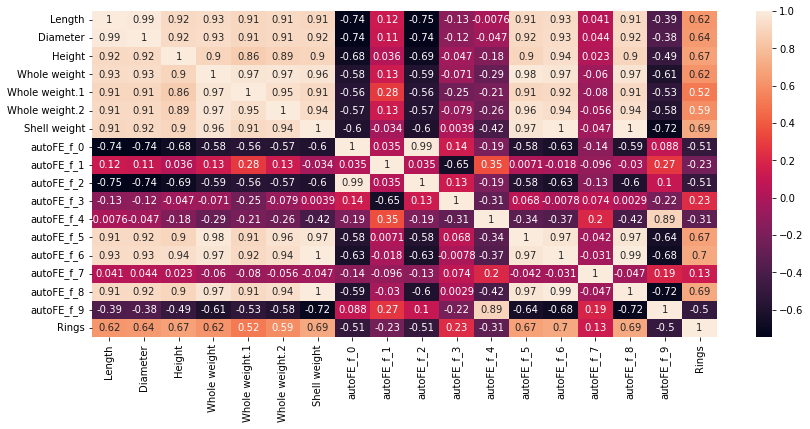

In [84]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, ax = ax)

Correlation to target variable after outlier removal

In [91]:
df_train_openfe, df_train_float_outliers = get_float_outliers(df_train_openfe, cols_float_openfe, True)
cols_numeric = cols_float_openfe + ["Rings"]
df_train_numeric = df_train_openfe[cols_numeric]
corr = df_train_numeric.corr()
target_correlation = corr["Rings"].sort_values(ascending=False)
print(target_correlation)

Rings             1.000000
autoFE_f_6        0.540584
Shell weight      0.536901
autoFE_f_8        0.536318
autoFE_f_5        0.517338
Height            0.506677
Diameter          0.456202
Whole weight      0.448507
Length            0.436730
Whole weight.2    0.424962
autoFE_f_3        0.351316
Whole weight.1    0.341109
autoFE_f_7        0.193421
autoFE_f_1       -0.279902
autoFE_f_4       -0.441370
autoFE_f_9       -0.517319
autoFE_f_2       -0.552887
autoFE_f_0       -0.554047
Name: Rings, dtype: float64


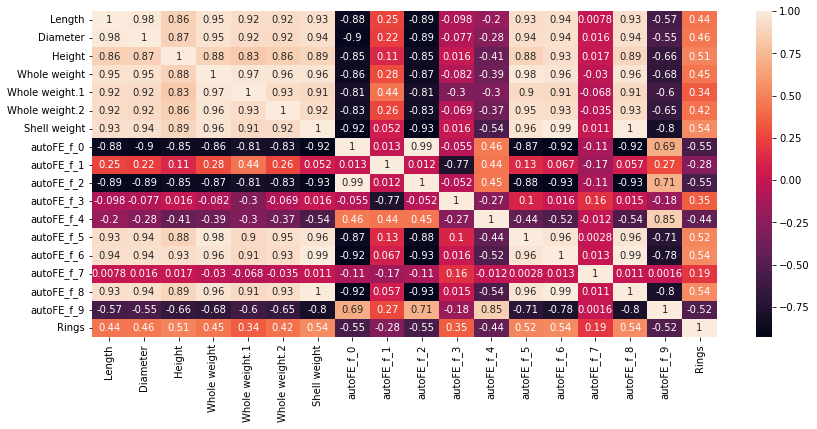

In [92]:
fig, ax = plt.subplots(figsize=(14, 6))
ax = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, ax = ax)